Import necessary packages.

In [2]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [3]:
### NOTE: it is important here to further declare these variables to be nonzero and positive (otherwise sympy cannot find solution for the FOCs)
Q, c, a, b, pi = symbols('Q c a b \pi', nonzero=True, positive=True)

# monopoly setup

## Firm and demand

Assume one monopolistic firm sells a product in a given market. We assume the firm has a constant marginal cost, $c$.

The market demand for a product is linear, such that the inverse demand function takes the form of
\begin{align}
    p = a - b Q
\end{align}

We assume $a > c$, so that consumer's willingness to pay exceeds the firm's cost to produce.

## Graph

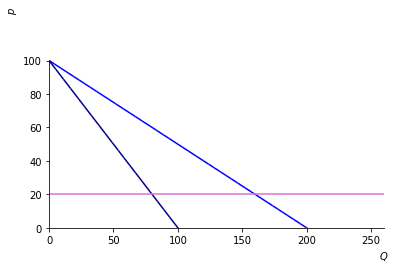

In [7]:
# Plotting inverse market demand
DInverse = a - b*Q
Dplot0 = plot(DInverse.subs([(a,100),(b,Rational(1,2))]), (Q,0,300), xlim=[0,260], ylim=[0,130], xlabel="$Q$", ylabel="$p$", show=False)

# Plotting MB curve
MRcurve = diff(DInverse*Q, Q)
MRplot0 = plot(MRcurve.subs([(a,100),(b,Rational(1,2))]), (Q,0,300), xlim=[0,200], ylim=[0,130], xlabel="$Q$", ylabel="$p$", show=False)

# Plotting MC curve
MCcurve = c
MCplot0 = plot(MCcurve.subs([(c,20)]), (Q,0,300), xlim=[0,200], ylim=[0,130], xlabel="$Q$", ylabel="$p$", show=False)


# combine plots into one plot
plot_combo = Dplot0
plot_combo.extend(MRplot0)
plot_combo.extend(MCplot0)

# assign colors for each line
plot_combo[0].line_color='blue'
plot_combo[1].line_color='darkblue'
plot_combo[2].line_color='orchid'

# show plot
plot_combo.show()

## The firm's profit-maximization problem

Under these modeling assumptions, each firm's profit is
\begin{align}
    \pi &= p\cdot Q - c \cdot Q \\
            &= (p-c)Q \tag{1}
\end{align}

Plugging in the inverse demand function, each firm's profit is
\begin{align}
    \pi(Q) & = \big(a - bQ - c\big) Q   \tag{2}
\end{align}

From here, we can try to find the FOC w.r.t. Q for the firm. But we will explore an alternative development before going this route.

## The firm's profit-maximization problem (re-write in terms of p)

Instead, from equation (1), we can plug in the demand function (not inverse demand) and rewrite $\pi$ in terms of $p$. Specifically, the firm's demand function is 
$$ Q = \frac{a}{b} - \frac{p}{b}.$$
Plugging into (1), and we have
\begin{align}
    \pi(p) & = (p-c)\big(\frac{a}{b} - \frac{p}{b}\big)  \tag{3}
\end{align}

# Analysis

## Monopolist chooses Q to maximize profit

If the firm chooses $Q$ to maximize its profit, the firm maximizes (2), i.e.,
\begin{align}
    \max_{Q}\pi(Q) & = \big(a - bQ - c\big) Q
\end{align}
which implies the FOC
\begin{align}
    \big(a - bQ - c\big) - bQ = 0 
    \quad\Rightarrow\quad 
    Q^* = \frac{a-c}{2b}
\end{align}
Plugging back into the inverse demand funciton, the monopolist would price at
\begin{align}
    p^* &= a - bQ^* \\
        &= a - \frac{a-c}{2} \\
        &= \frac{a+c}{2}
\end{align}

## Monopolist chooses p to maximize profit

The firm maximizes
\begin{align}
    \max_p \pi(p) & = (p-c)\big(\frac{a}{b} - \frac{p}{b}\big) 
\end{align}

which leads to FOC
\begin{align}
    \frac{\partial \pi(p)}{\partial p} & = \big(\frac{a}{b} - \frac{p}{b}\big) - \frac{p-c}{b} \\
        &= \frac{a}{b} - \frac{2p}{b} + \frac{c}{b} =0 \quad\Rightarrow\quad p^* = \frac{a+c}{2}
\end{align}

the same profit-maximizing price as the case when the monopolist chooses quantity.

# Challenge

**Q1**: solve two cases of the monopoly profit-maximization problem using sympy
* if the firm chooses output level to maximize profit
* if the firm chooses price level to maximize profit
* does it matter what the firm choose? why or why not?

**Q2**: (Drew Fallon challenge) Why isn't the firm's profit maximized when $p - AC$ is maximized?

\begin{align}
    \max_{Q}\pi &= pQ - c(Q) \\
                &= pQ - Q* \underbrace{\frac{c(Q)}{Q}}_{AC(Q)} \\
                &= Q \big( p - AC(Q) \big)
\end{align}
Let's take the FOC w.r.t. Q
\begin{align}
    \frac{\partial \pi}{\partial Q} &= (p-AC) + Q \frac{\partial \big( p-AC(Q) \big)}{\partial Q}
\end{align}
If the firm chooses $Q$ where $p-AC(Q)$ is maximized, then we would have 
$$\frac{\partial \big( p-AC(Q) \big)}{\partial Q} = 0$$ 
which means $ \frac{\partial \pi}{\partial Q} > 0 $ as long as $p - AC > 0$, in other words, the firm is not maximizing profit at such quantity if the profit is positive.